[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-DecisionTrees/blob/main/ml-dtrees.ipynb)

# Decision Trees
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!pip install scikit-learn  #Needed for data and train-test split generation
!git clone https://www.github.com/azad-academy/MLBasics-DecisionTrees

In [ ]:
# Needed only For plotting the tree diagrams
!pip install graphviz  

In [1]:
from dtree import *

# Building Decision Tree & Visualizing the Constraints

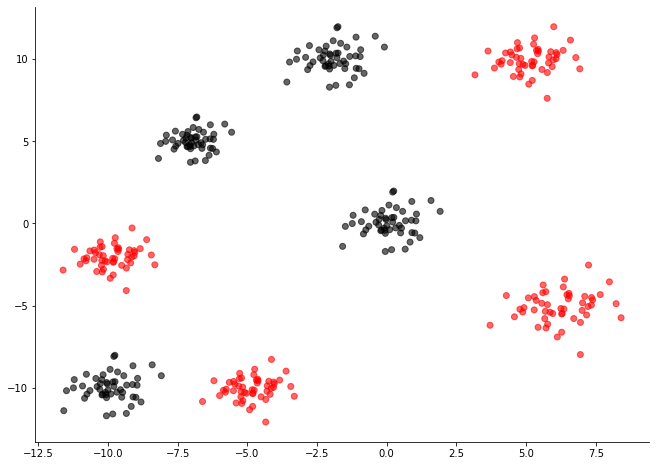

In [2]:
centers = np.array([[(0, 0) ,(6, -5)],[(-10, -10) ,(5, 10)],[(-7, 5) ,(-5, -10)],[(-2, 10),(-10, -2)]])
cluster_std = np.array([[0.8, 1],[0.8, 0.8],[0.6, 0.7],[0.8, 0.7]])

X = None
for i in range(len(centers)):
    x, y = make_blobs(n_samples=100, cluster_std=cluster_std[i], centers=centers[i], n_features=2, random_state=10)
    if(X is None):
        X = x
        Y = y
    else:
        X = np.concatenate((X,x))
        Y = np.concatenate((Y,y))


plot_data(X, 1*Y,colors=['k','r'])


In [3]:
dtree = DecisionTree(min_sample_size=3, max_tree_depth=4)
dtree.train(X,np.array([Y]).T)
Y_hat = dtree.classify(X)

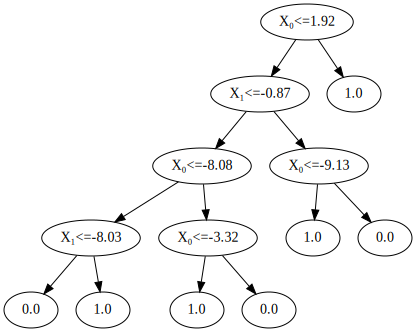

In [4]:
dtree.show_tree("clusters")

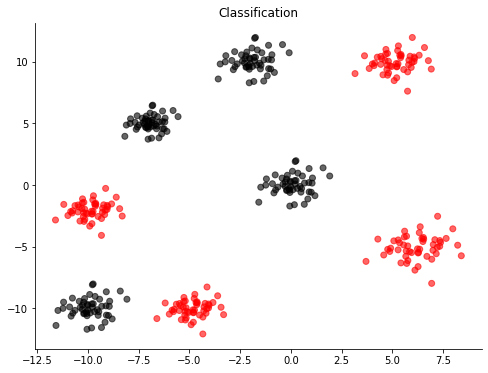

In [5]:
nlcfig,ax = plt.subplots(figsize=(8,6))
plot_data(X,Y_hat.astype(int),colors=['k','r'],plt_title="Classification",canvas=ax)


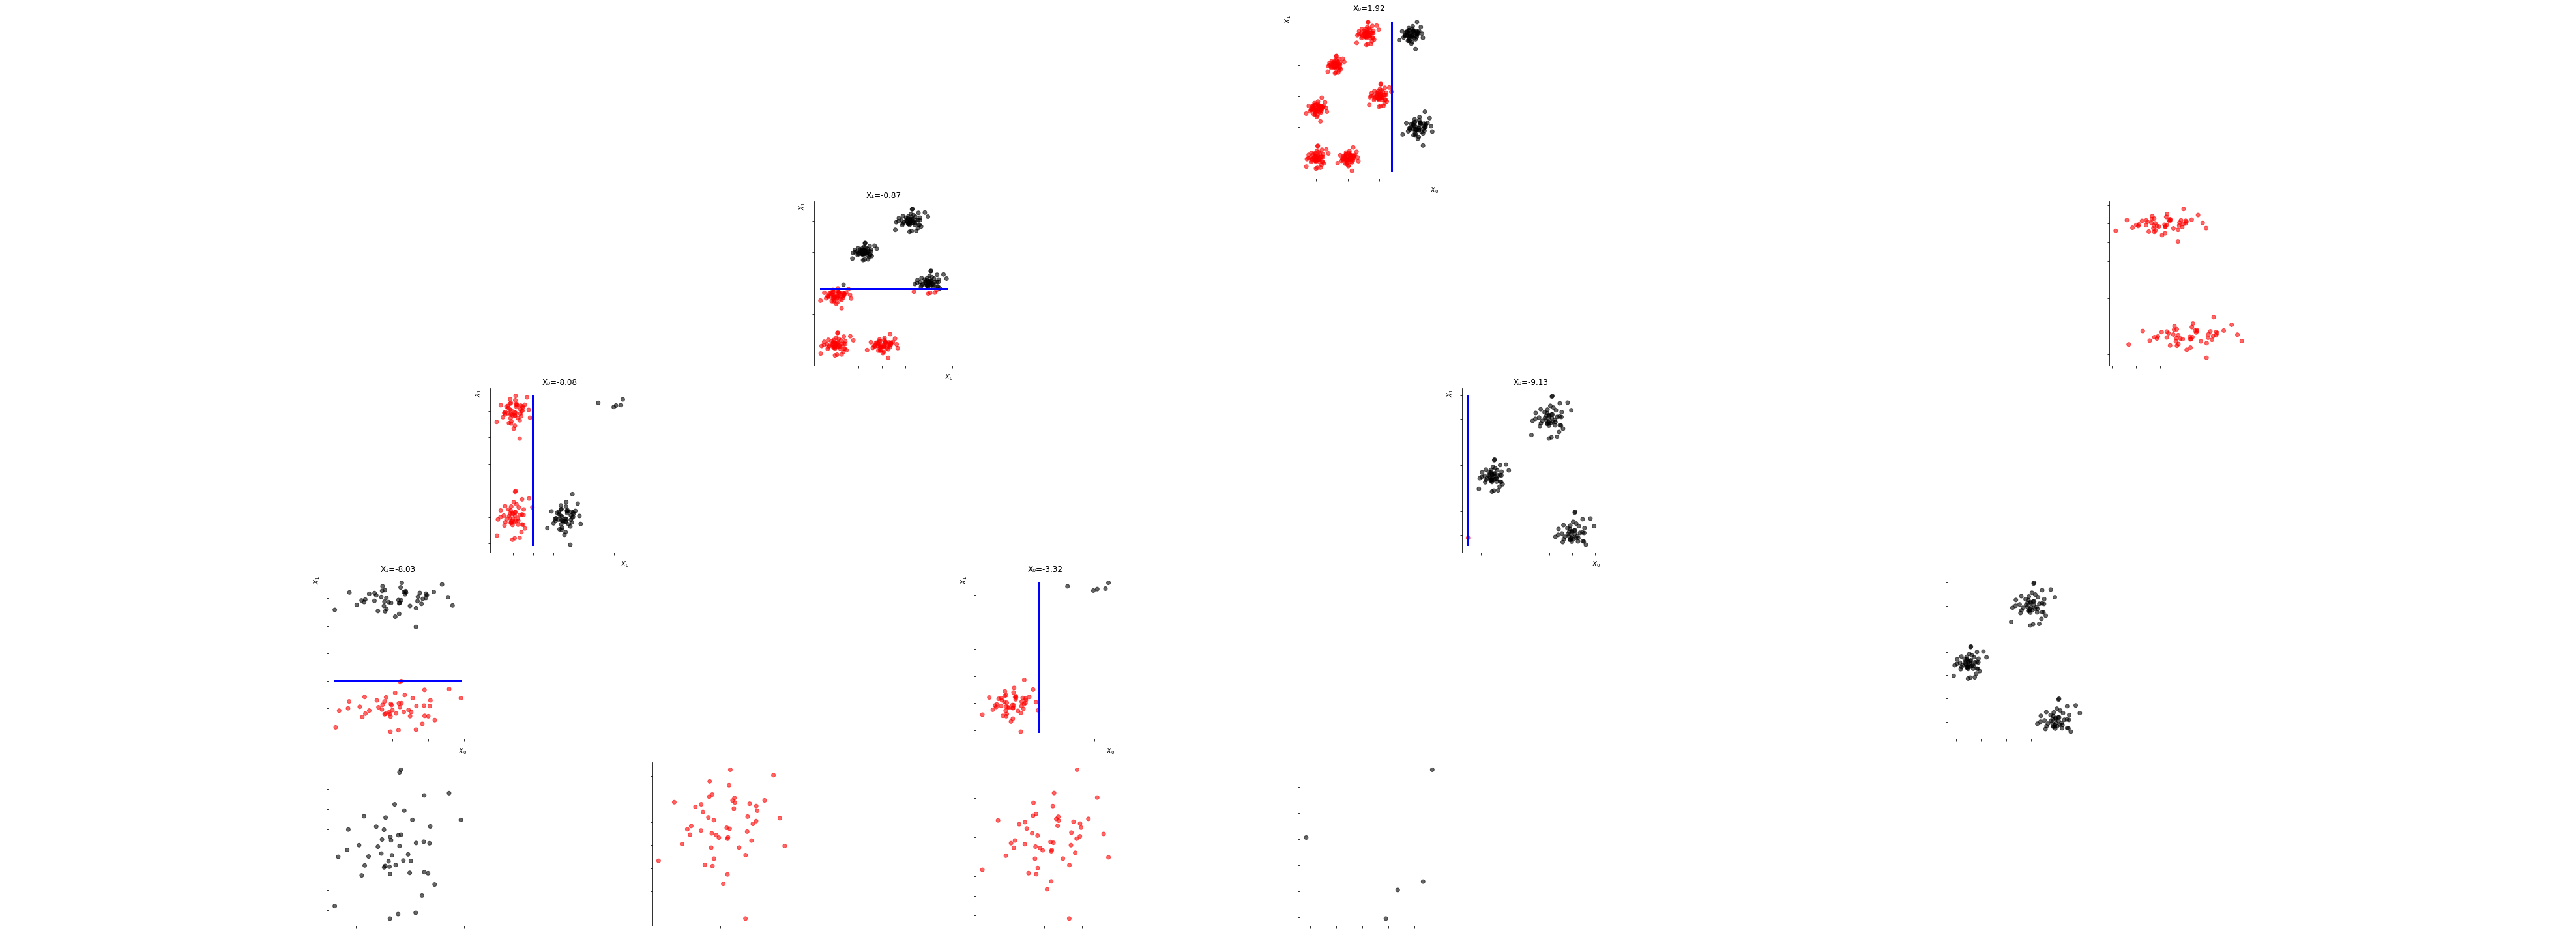

In [6]:
dtree.plot_constraints(X)

# DecisionTrees for Linearly Separable Data

In [7]:
rstate = np.random.RandomState(10)
data = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,random_state=rstate)
X = data[0]
Y = data[1]

#Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)


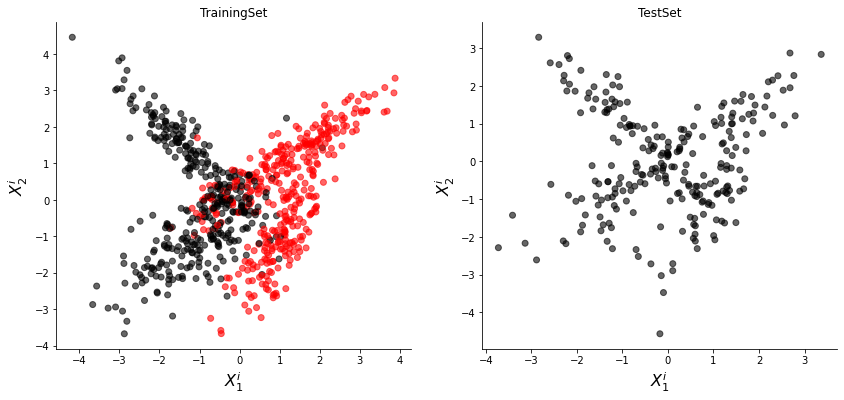

In [8]:
data_fig,axes = plt.subplots(1,2,figsize=(14,6))
plot_data(X_train,Y_train,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test,np.zeros((len(X_test),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

# Single Variable Linear Classifier

In [9]:
dtree = DecisionTree(min_sample_size=3, max_tree_depth=4)   #Single Variable linear classifier
dtree.train(X_train,np.array([Y_train]).T)

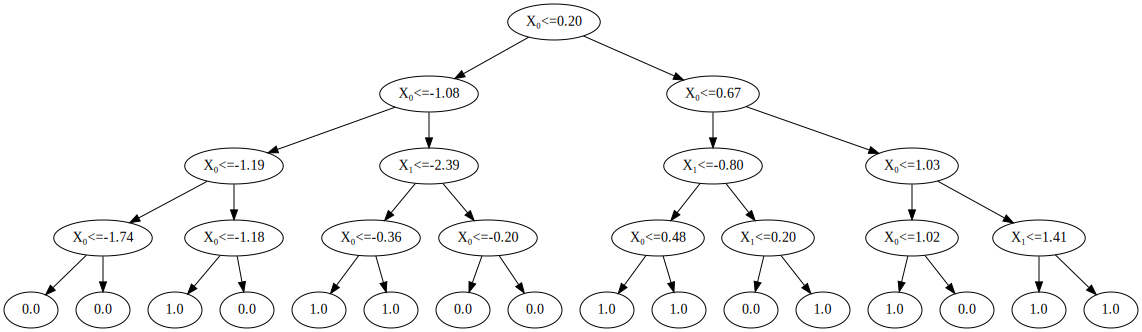

In [10]:
dtree.show_tree("single-variable-classifier")

In [11]:
Y_hat = dtree.classify(X_test)
accuracy_score(Y_test, Y_hat)

0.852

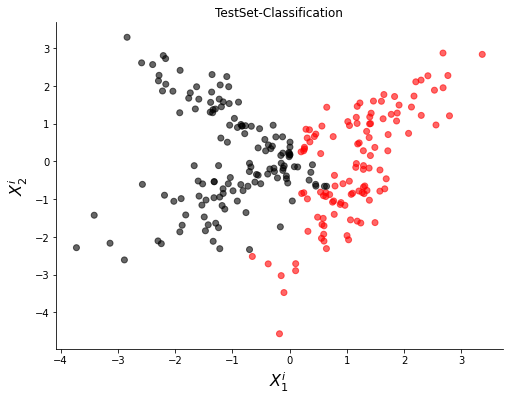

In [12]:
lfig,ax = plt.subplots(figsize=(8,6))
plot_data(X_test,Y_hat.astype(int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TestSet-Classification",canvas=ax)

# Multivariate Linear Classifiers

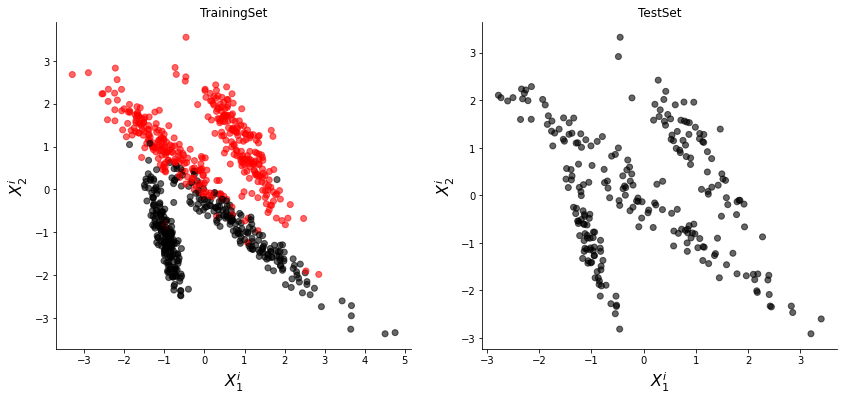

In [13]:
rstate = np.random.RandomState(20)
data = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,random_state=rstate)
X1 = data[0]
Y1 = data[1]

#Splitting the data into train and test sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=10)

data_fig,axes = plt.subplots(1,2,figsize=(14,6))
plot_data(X_train1,Y_train1,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test1,np.zeros((len(X_test1),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

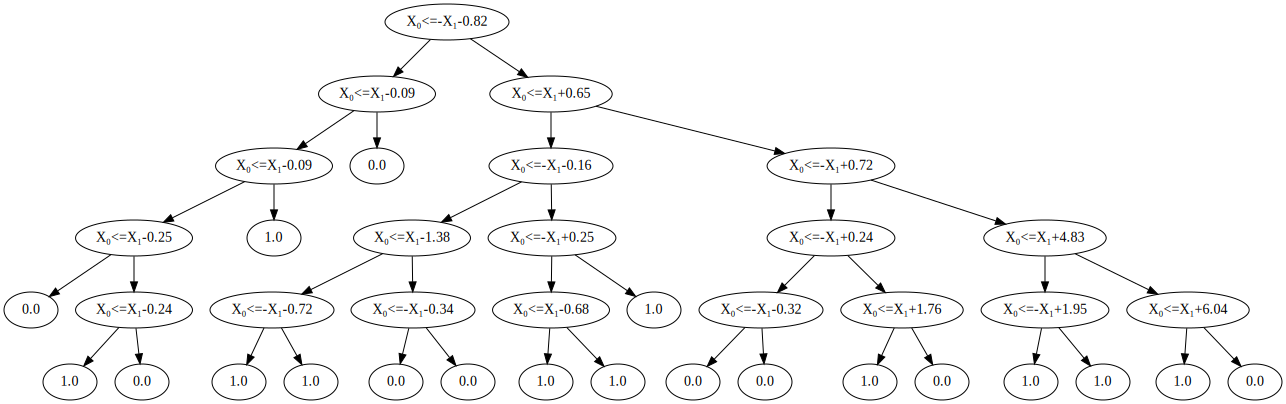

In [14]:
dtree = DecisionTree(max_tree_depth=5,method="multi")   #Multi-variable linear classification
dtree.train(X_train1,np.array([Y_train1]).T)
dtree.show_tree("Multi-Variable-Classifier")

In [15]:
Y_hat1 = dtree.classify(X_test1)
accuracy_score(Y_test1, Y_hat1)

0.956

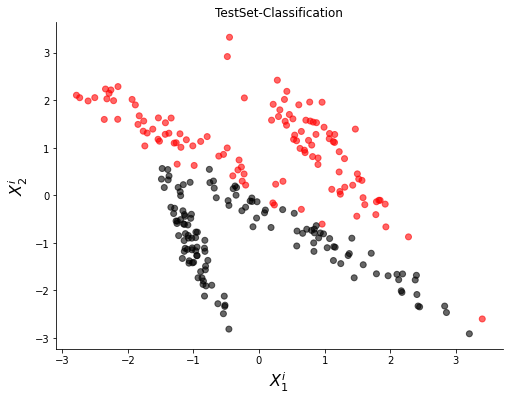

In [16]:
nlcfig,ax = plt.subplots(figsize=(8,6))
plot_data(X_test1,Y_hat1.astype(int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TestSet-Classification",canvas=ax)

# DecisionTrees on Non-Linear Data


In [2]:
#Generating Non-Linear Data
rstate = np.random.RandomState(10)
X2, Y2 = sklearn.datasets.make_moons(n_samples=1000,noise=0.1,random_state=rstate)

#Splitting the data into train and test sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=20)

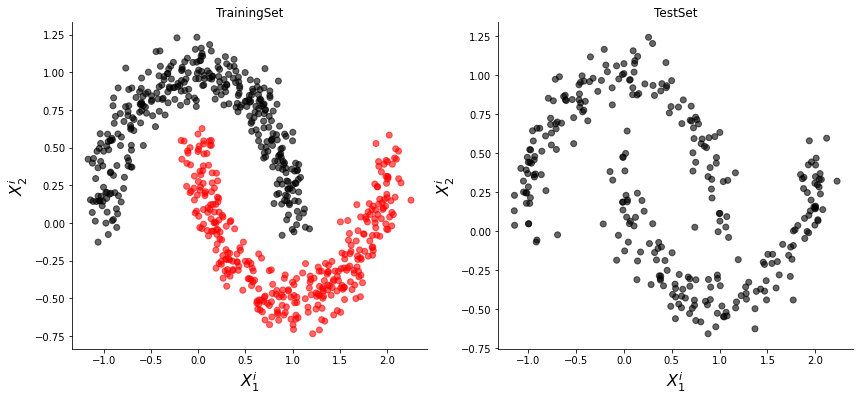

In [3]:
data_fig2,axes = plt.subplots(1,2,figsize=(14,6))
plot_data(X_train2,Y_train2,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test2,np.zeros((len(X_test2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

# Decision Tree Classifier with Multivariate Linear Constraints

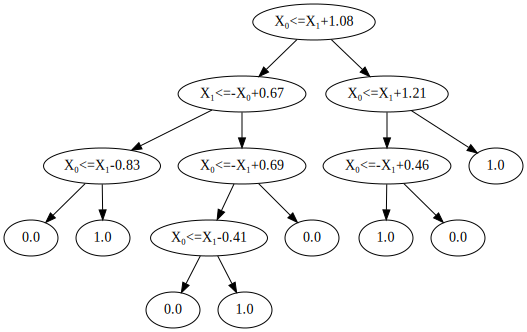

In [5]:
dtree = DecisionTree(min_sample_size=3, max_tree_depth=4,method="multi")   #Multi-variable linear classification
dtree.train(X_train2,np.array([Y_train2]).T)
dtree.show_tree("Multi-Variable-Classifier-for-Non-Linear-Classification")

In [6]:
Y_hat2 = dtree.classify(X_test2)
accuracy_score(Y_test2, Y_hat2)

0.99

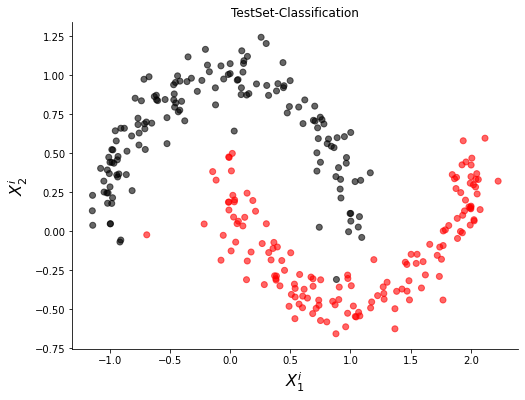

In [7]:
nlcfig,ax = plt.subplots(figsize=(8,6))
plot_data(X_test2,Y_hat2.astype(int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TestSet-Classification",canvas=ax)

# Decision Tree Classifier with Non-Linear Constraints

In [8]:
dtree = DecisionTree(min_sample_size=3, max_tree_depth=5,method="non-linear")  #Non-linear Classifier
dtree.train(X_train2,np.array([Y_train2]).T)

In [9]:
Y_hat2 = dtree.classify(X_test2)
accuracy_score(Y_test2, Y_hat2)

0.9933333333333333

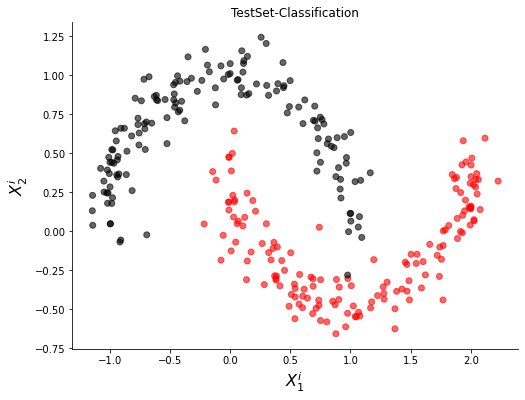

In [10]:
nlcfig,ax = plt.subplots(figsize=(8,6))
plot_data(X_test2,Y_hat2.astype(int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TestSet-Classification",canvas=ax)

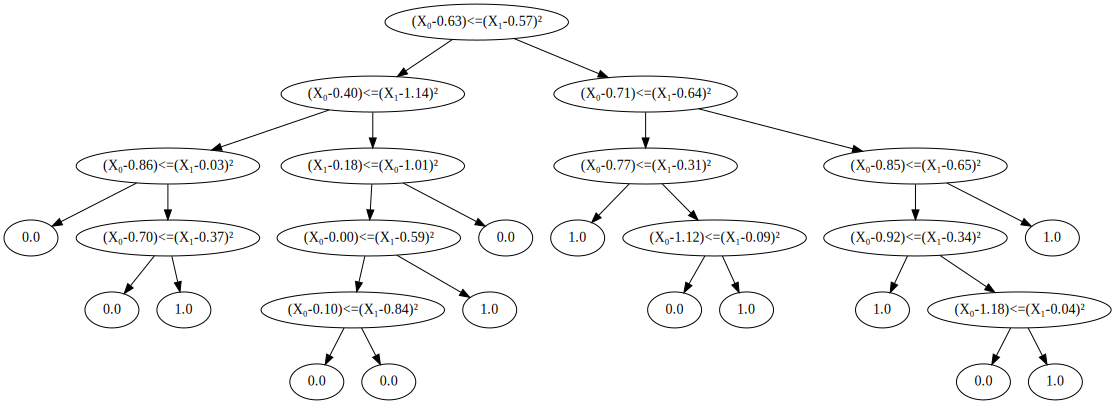

In [11]:
dtree.show_tree("Non-Linear-Classifier")

# Decision Trees for Data with Nominal Class Labels

In [12]:
data = load_iris()

X = data["data"]
Y = data["target"]
fnames = data["feature_names"]
labels = data["target_names"]
Y = np.array([labels[Y]],dtype="object").T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

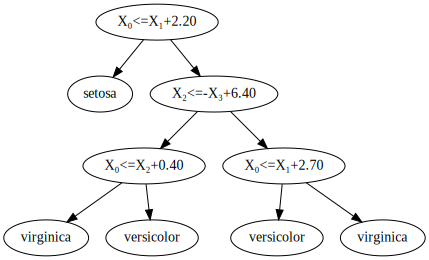

In [13]:
dtree = DecisionTree(min_sample_size=3, max_tree_depth=3,method="multi")
dtree.train(X_train,Y_train)

dtree.show_tree("iris")

In [14]:
Y_hat = dtree.classify(X_test)
accuracy_score(Y_test, Y_hat)

0.9736842105263158